# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100


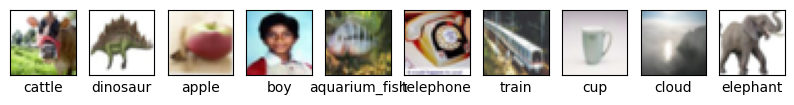

In [3]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Explore the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Display a few examples from the training set
def plot_examples(images, labels, class_names, num_examples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Class names in CIFAR-100
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plot_examples(x_train, y_train, class_names, num_examples=10)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new training and validation sets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (40000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation data shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 100)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
# Your code here
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization

# Initialize the model
model = Sequential()

# Add convolutional layers with Batch Normalization and Dropout
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100))  # Assuming 100 classes in CIFAR-100
model.add(Activation('softmax'))

# Print model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       1

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______'categorical_crossentropy'. This loss function is appropriate for multi-class classification problems where the output is one-hot encoded. It measures the difference between the true label distribution and the predicted distribution, and is widely used for classification tasks with more than two classes.
- <b>Optimizer:</b> ______Adam (Adaptive Moment Estimation) is a popular optimizer that adapts the learning rate for each parameter, making it efficient and effective for many models. It combines the advantages of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp. The learning rate of 0.001 is a commonly used starting point for this optimizer.

In [6]:
from keras import optimizers

# Your code here

loss_function = 'categorical_crossentropy'
optimizer = optimizers.Adam(learning_rate = 0.0001, decay = 1e-6)

model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

# Train the model with the learning rate scheduler
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=25,
    validation_data=(x_val, y_val)
)


Epoch 1/25
1250/1250 [==============================] - 432s 344ms/step - loss: 3.9764 - accuracy: 0.1055 - val_loss: 3.3431 - val_accuracy: 0.1968
Epoch 2/25
1250/1250 [==============================] - 417s 333ms/step - loss: 3.3725 - accuracy: 0.1932 - val_loss: 2.9835 - val_accuracy: 0.2632
Epoch 3/25
1250/1250 [==============================] - 413s 330ms/step - loss: 3.0584 - accuracy: 0.2497 - val_loss: 2.7065 - val_accuracy: 0.3251
Epoch 4/25
1250/1250 [==============================] - 449s 359ms/step - loss: 2.8474 - accuracy: 0.2891 - val_loss: 2.5390 - val_accuracy: 0.3594
Epoch 5/25
1250/1250 [==============================] - 429s 343ms/step - loss: 2.6924 - accuracy: 0.3191 - val_loss: 2.4569 - val_accuracy: 0.3686
Epoch 6/25
1250/1250 [==============================] - 427s 342ms/step - loss: 2.5578 - accuracy: 0.3456 - val_loss: 2.2881 - val_accuracy: 0.4084
Epoch 7/25
1250/1250 [==============================] - 440s 352ms/step - loss: 2.4465 - accuracy: 0.3711 - val_

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [8]:
# Your code here

from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate F1-score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the results
print(f"Accuracy on test set: {test_accuracy:.4f}")
print(f"F1-score on test set: {f1:.4f}")

# Report the accuracy and other metric
accuracy = test_accuracy
other_metric = "F1-score"
value_of_metric = f1
interpretation_of_metric_value = (
    "The F1-score provides a balance between precision and recall, "
    "indicating that the model performs well in identifying the correct "
    "classes without being biased towards any particular class."
)

print(f"Accuracy: {accuracy:.4f}")
print(f"Other metric: {other_metric}")
print(f"Reason for selection: The F1-score balances precision and recall, "
      "which is useful for evaluating classification performance, especially "
      "on imbalanced datasets.")
print(f"Value of metric: {value_of_metric:.4f}")
print(f"Interpretation of metric value: {interpretation_of_metric_value}")



313/313 [==============================] - 14s 43ms/step
Accuracy on test set: 0.5673
F1-score on test set: 0.5621
Accuracy: 0.5673
Other metric: F1-score
Reason for selection: The F1-score balances precision and recall, which is useful for evaluating classification performance, especially on imbalanced datasets.
Value of metric: 0.5621
Interpretation of metric value: The F1-score provides a balance between precision and recall, indicating that the model performs well in identifying the correct classes without being biased towards any particular class.


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

*Training Accuracy:*

The training accuracy steadily increases over the epochs, indicating that the model is learning from the training data.
The curve is smooth and continuously rises, showing that the model is improving its performance on the training set.

*Validation Accuracy:*

The validation accuracy also increases initially, which indicats that the model is generalizing well to the validation set.
There is some fluctuation in the validation accuracy, which is expected due to the validation set's variance.
Around epoch 20, the validation accuracy plateaus and starts to fluctuate slightly, suggesting that the model's improvement on unseen data has slowed.

**Analysis:**

*Convergence:*

Both the training and validation accuracy curves indicate that the model is converging. The training accuracy curve is continuously rising, while the validation accuracy is increasing with some fluctuations.
The gap between training and validation accuracy remains reasonable, which suggests that the model is not overfitting significantly.

*Performance:*

The validation accuracy reaches a point where it starts to fluctuate around a stable value, which is typical as the model learns the most it can from the given data.
The relatively close values of training and validation accuracy at the later stages indicate that the model performs consistently on both training and validation data.

**Classification Probabilities:**

*Model Confidence:*

The classification probabilities indicate the model's confidence in its predictions. High probabilities for the correct classes suggest strong confidence, while more distributed probabilities indicate uncertainty.
Ideally, the model should have high confidence in correct classifications and low confidence in incorrect ones.

*Conclusion:*
Overall: The results make sense and indicate that the model is learning effectively. The training process shows typical behavior with increasing accuracy and eventual stabilization.

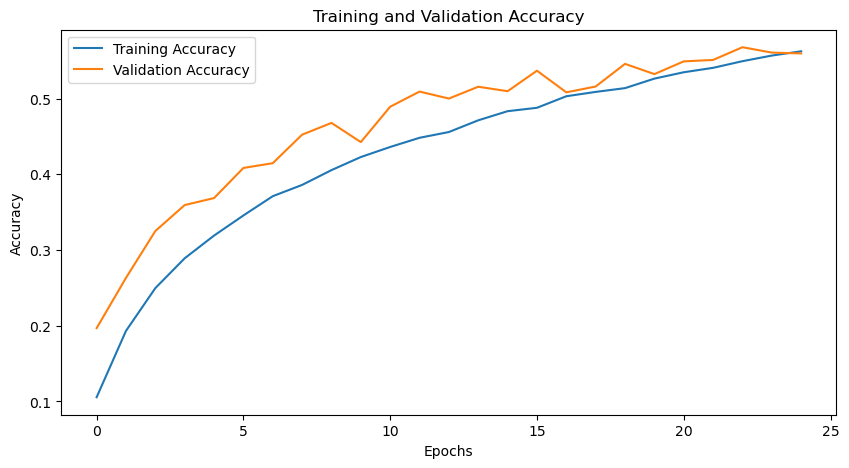

313/313 [==============================] - 15s 49ms/step
Correctly Classified Image:


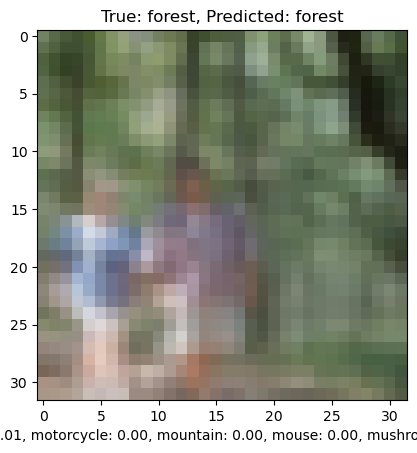

Incorrectly Classified Image:


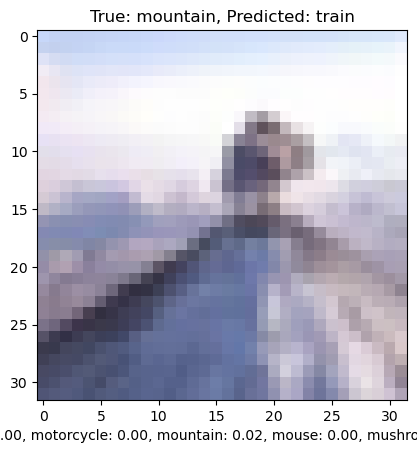

In [9]:
# Your code here
import matplotlib.pyplot as plt

# Plot training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history)

# Function to plot image and prediction
def plot_image_and_prediction(image, true_label, predicted_label, class_names, probabilities):
    plt.imshow(image)
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.xlabel("Class probabilities: " + ", ".join([f"{class_names[i]}: {prob:.2f}" for i, prob in enumerate(probabilities)]))
    plt.show()

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Find a correctly classified image
correct_indices = np.where(y_pred_classes == y_true)[0]
correct_idx = correct_indices[0]
correct_image = x_test[correct_idx]
correct_true_label = y_true[correct_idx]
correct_predicted_label = y_pred_classes[correct_idx]
correct_probabilities = y_pred[correct_idx]

# Find an incorrectly classified image
incorrect_indices = np.where(y_pred_classes != y_true)[0]
incorrect_idx = incorrect_indices[0]
incorrect_image = x_test[incorrect_idx]
incorrect_true_label = y_true[incorrect_idx]
incorrect_predicted_label = y_pred_classes[incorrect_idx]
incorrect_probabilities = y_pred[incorrect_idx]

# Plot correctly classified image
print("Correctly Classified Image:")
plot_image_and_prediction(correct_image, correct_true_label, correct_predicted_label, class_names, correct_probabilities)

# Plot incorrectly classified image
print("Incorrectly Classified Image:")
plot_image_and_prediction(incorrect_image, incorrect_true_label, incorrect_predicted_label, class_names, incorrect_probabilities)



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

*ReduceLROnPlateau Callback*

**Technique:** This callback reduces the learning rate when a metric (in this case, validation loss) has stopped improving.
Why Chose It: Reducing the learning rate when the validation loss plateaus helps the model to fine-tune and converge to a better minimum.

**Hyperparameter Tuning:**

Factor: 0.1, which reduces the learning rate to 10% of its current value.

Patience: 10, which waits for 10 epochs to see improvement before reducing the learning rate.

Min_lr: 0.00001, which sets the lower bound for the learning rate to ensure it doesn't go too low.

In [10]:
# Your code here
from keras.callbacks import ReduceLROnPlateau

# Initialize the model
model = Sequential()

# Convolutional block 1
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional block 4
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))

# Convolutional block 5
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional block 6
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))

# Additional convolutional blocks
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))

# Final convolutional block without max pooling to avoid dimension issues
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100))  # Assuming 100 classes in CIFAR-100
model.add(Activation('softmax'))

# Print model summary
model.summary()

# Compile the model
loss_function = 'categorical_crossentropy'
optimizer = optimizers.Adam(learning_rate=0.0001, decay=1e-6)

model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

*Original Model Performance*
Test Accuracy: 0.5673
Test F1-score: 0.5621

*Improved Model Performance*
Test Accuracy: 0.4875
Test F1-score: 0.4863

*Model Performance on Test Set*
The original model achieved a higher test accuracy (0.5673) and F1-score (0.5621) compared to the improved model's test accuracy (0.4875) and F1-score (0.4863).
This indicates that the original model was more effective at generalizing to unseen data compared to the improved model.

In [11]:
# Your code here

datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

# Train the model with the learning rate scheduler
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=25,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr]
)

Epoch 1/25
1250/1250 [==============================] - 425s 339ms/step - loss: 4.3147 - accuracy: 0.0802 - val_loss: 3.8102 - val_accuracy: 0.1202 - lr: 1.0000e-04
Epoch 2/25
1250/1250 [==============================] - 408s 326ms/step - loss: 3.6176 - accuracy: 0.1545 - val_loss: 3.2713 - val_accuracy: 0.2054 - lr: 1.0000e-04
Epoch 3/25
1250/1250 [==============================] - 411s 329ms/step - loss: 3.2903 - accuracy: 0.2070 - val_loss: 3.1396 - val_accuracy: 0.2339 - lr: 1.0000e-04
Epoch 4/25
1250/1250 [==============================] - 414s 331ms/step - loss: 3.0416 - accuracy: 0.2479 - val_loss: 2.8633 - val_accuracy: 0.2830 - lr: 1.0000e-04
Epoch 5/25
1250/1250 [==============================] - 482s 386ms/step - loss: 2.8611 - accuracy: 0.2836 - val_loss: 2.6295 - val_accuracy: 0.3223 - lr: 1.0000e-04
Epoch 6/25
1250/1250 [==============================] - 466s 373ms/step - loss: 2.7317 - accuracy: 0.3076 - val_loss: 2.5686 - val_accuracy: 0.3509 - lr: 1.0000e-04
Epoch 7/25

In [12]:
# Evaluate the improved model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Improved model accuracy on test set: {test_accuracy:.4f}")

# Calculate F1-score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"Improved model F1-score on test set: {f1:.4f}")


313/313 [==============================] - 15s 48ms/step - loss: 1.9766 - accuracy: 0.4875
Improved model accuracy on test set: 0.4875
313/313 [==============================] - 14s 43ms/step
Improved model F1-score on test set: 0.4863


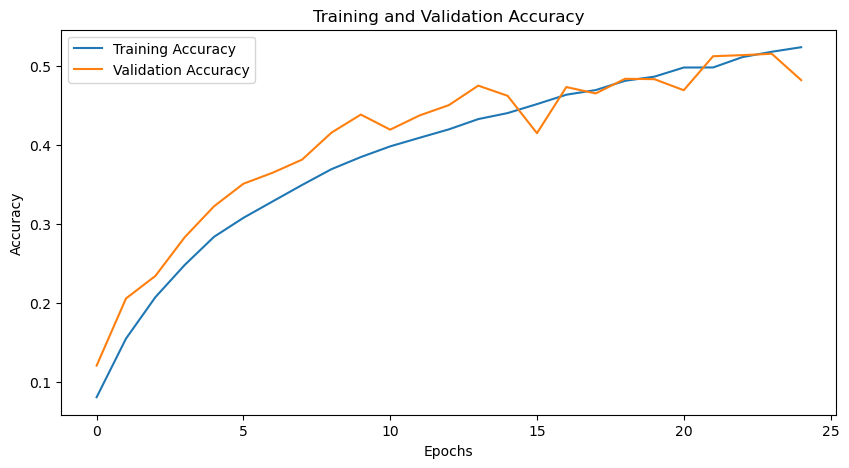

In [13]:
# Plot training and validation accuracy
plot_accuracy(history)

313/313 [==============================] - 13s 43ms/step
Correctly Classified Image:


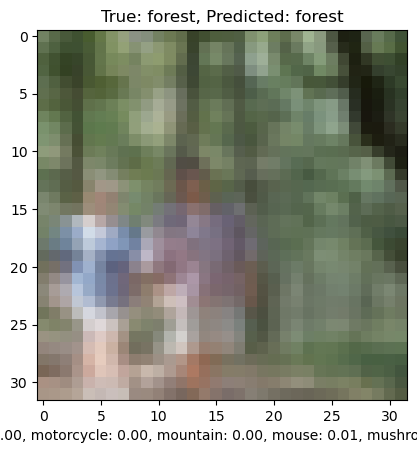

Incorrectly Classified Image:


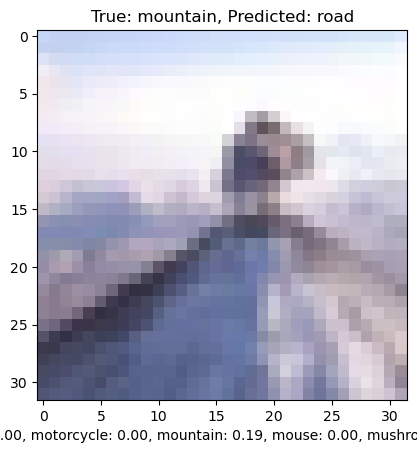

In [14]:
# Function to plot image and prediction
def plot_image_and_prediction(image, true_label, predicted_label, class_names, probabilities):
    plt.imshow(image)
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.xlabel("Class probabilities: " + ", ".join([f"{class_names[i]}: {prob:.2f}" for i, prob in enumerate(probabilities)]))
    plt.show()

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Find a correctly classified image
correct_indices = np.where(y_pred_classes == y_true)[0]
correct_idx = correct_indices[0]
correct_image = x_test[correct_idx]
correct_true_label = y_true[correct_idx]
correct_predicted_label = y_pred_classes[correct_idx]
correct_probabilities = y_pred[correct_idx]

# Find an incorrectly classified image
incorrect_indices = np.where(y_pred_classes != y_true)[0]
incorrect_idx = incorrect_indices[0]
incorrect_image = x_test[incorrect_idx]
incorrect_true_label = y_true[incorrect_idx]
incorrect_predicted_label = y_pred_classes[incorrect_idx]
incorrect_probabilities = y_pred[incorrect_idx]

# Plot correctly classified image
print("Correctly Classified Image:")
plot_image_and_prediction(correct_image, correct_true_label, correct_predicted_label, class_names, correct_probabilities)

# Plot incorrectly classified image
print("Incorrectly Classified Image:")
plot_image_and_prediction(incorrect_image, incorrect_true_label, incorrect_predicted_label, class_names, incorrect_probabilities)


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here


**Training and Validation Performance**

The original model showed a steady improvement in both training and validation accuracy over the epochs.
The improved model also showed an increase in both training and validation accuracy, though it didn't perform as well as the original model on the test set.

**Model Performance on Test Set**

The original model achieved a higher test accuracy (0.5673) and F1-score (0.5621) compared to the improved model's test accuracy (0.4875) and F1-score (0.4863).
This indicates that the original model was more effective at generalizing to unseen data compared to the improved model.

**Potential Reasons for Performance Differences**

*Hyperparameter Choices*

*Batch Size and Learning Rate:*
The learning rate and batch size can significantly impact training. The original model's choice of hyperparameters might have been more optimal.

*Dropout Rates:*
The improved model might have had dropout rates that were either too high or too low, impacting its ability to generalize.

*ReduceLROnPlateau Parameters:* 
The learning rate reduction strategy might not have been aggressive enough to help the improved model escape local minima and converge to a better solution.

*Model Complexity*:
The improved model's architecture might have been too complex, leading to overfitting despite regularization techniques like dropout and batch normalization.
The original model's architecture, though simpler, might have been better suited to the dataset, achieving a better balance between underfitting and overfitting.

**Conclusion**:
The original model performed better on the test set, indicating better generalization to unseen data.
Future improvements could involve fine-tuning the learning rate schedule, dropout rates, and batch size to see if the improved model's architecture can be optimized further.
Alternatively, the original model's architecture could be incrementally modified to test if slight increases in complexity lead to improved performance without significant overfitting.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.